# Titanic - Machine Learning from Disaster
Predict survival on the Titanic and get familiar with ML basics

Importing libraries

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import sklearn. 

In [164]:
file_path_train = "C:\\Users\\yaahr\\majhi jagah\\ML projects\\titanic\\train.csv"
test_x_path = "C:\\Users\\yaahr\\majhi jagah\\ML projects\\titanic\\test.csv"
test_y_path = "C:\\Users\\yaahr\\majhi jagah\\ML projects\\titanic\\gender_submission.csv"

train_data = pd.read_csv(file_path_train)
test_x = pd.read_csv(test_x_path)
test_y = pd.read_csv(test_y_path)

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
train_df1 = train_df

In [165]:
train_data.shape

(891, 12)

In [166]:
test_data.shape

(418, 11)

In [168]:
def preprocess(df):
  ## Lowercase indices
  df.columns = df.columns.astype(str).str.lower()

  df['gender'] = df['sex'].map({'male':0, 'female':1})

  # bigger names = more important = survived?
  df['namelength'] = df.name.apply(lambda s: len(s))

  # get rid of string data in ticket numbers
  df['ticket'] = df.ticket.astype(str).str.rsplit(n=1)

  # remove decimals
  df['age'].fillna(df.age.mean(), inplace=True)
  df['fare'].fillna(df.fare.mean(), inplace=True)
  df['age'] = df.age.astype('int64')
  df['fare'] = df.fare.astype('int64')

  df.cabin.fillna('NONE', inplace=True)
  df['cabinType'] = df['cabin'].replace('/d+', '')
  # multiples are for families, select first for floor
  df['cabinType'] = df['cabinType'].str[0]

  # family size seems to negatively correlate with survival
  df['familySize'] = df['sibsp'] + df['parch']
  df.drop(['sibsp', 'parch'], axis=1, inplace=True)

  # categorize cabin floor 
  df.cabinType = pd.Categorical(df.cabinType)
  df['cabinCat'] = df.cabinType.cat.codes

  # categorize port
  df.embarked = pd.Categorical(df.embarked)
  df.embarked = df.embarked.cat.codes
  # 0 - C , 1 - q, 2 - s
  
  # bin age
  df['ageGroup'] = pd.cut(df.age, bins=5, labels=range(5))
    
  return df

X = preprocess(train_df)

X.head()

,passengerid,survived,pclass,name,sex,age,ticket,fare,cabin,embarked,gender,namelength,cabinType,familySize,cabinCat,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22,"[A/5, 21171]",7,NONE,2,0,23,N,1,7,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,"[PC, 17599]",71,C85,0,1,51,C,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,"[STON/O2., 3101282]",7,NONE,2,1,22,N,0,7,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,[113803],53,C123,2,1,44,C,1,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35,[373450],8,NONE,2,0,24,N,0,7,2


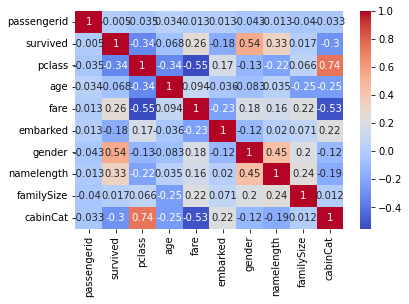

In [173]:
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)
plt.show()

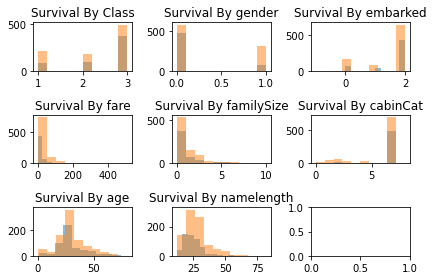

In [174]:
fig, axs = plt.subplots(nrows=3, ncols=3)

y = X['survived']
died = X[y == 0]

axs[0,0].hist(died['pclass'], alpha=0.5)
axs[0,0].hist(X['pclass'], alpha=0.5 )
axs[0,0].set_title('Survival By Class')

axs[0,1].hist(died['gender'], alpha=0.5)
axs[0,1].hist(X['gender'], alpha=0.5 )
axs[0,1].set_title('Survival By gender')

axs[0,2].hist(died['embarked'], alpha=0.5)
axs[0,2].hist(X['embarked'], alpha=0.5 )
axs[0,2].set_title('Survival By embarked')

axs[1,1].hist(died['familySize'], alpha=0.5) 
axs[1,1].hist(X['familySize'], alpha=0.5)
axs[1,1].set_title('Survival By familySize')

axs[1,2].hist(died['cabinCat'], alpha=0.5)
axs[1,2].hist(X['cabinCat'], alpha=0.5)
axs[1,2].set_title('Survival By cabinCat')

axs[1,0].hist(died['fare'], alpha=0.5)
axs[1,0].hist(X['fare'], alpha=0.5)
axs[1,0].set_title('Survival By fare')

axs[2,0].hist(died['age'], alpha=0.5)
axs[2,0].hist(X['age'], alpha=0.5)
axs[2,0].set_title('Survival By age')

axs[2,1].hist(died['namelength'], alpha=0.5)
axs[2,1].hist(X['namelength'], alpha=0.5)
axs[2,1].set_title('Survival By namelength')

plt.tight_layout()
plt.show()

In [175]:
nocabin = X[X['cabin'] == 'NONE']
rich = X[X['fare'] > 100]
first = X[X['pclass'] == 1]
poor = X[X['fare'] < 10]
# b is best
bfloor = X[X['cabinCat'] == 2]
family = X[X['familySize'] > 3]
men = X[X['gender']==0]
women = X[X['gender']==1]
adult = X[X['age']>18]
adultmen = X[(X['age'] > 13) & (X['gender']==0)]

tots = X[X['age']<=5]
kid = X[(X['age']<10) & (X['age']>5)]

youngboy = X[(X['age'] < 13) &(X['gender']==0)]

younggirl = X[(X['age'] < 13) &(X['gender']==1)]
senior = X[X['age'] > X.age.median() + 13.013778302447072 ]
french = X[X['embarked'] == 0 ]

# 100% survival rate
notlucky = X[(X.cabinType == 'B') & (X.familySize < 2) & (X.gender == 1)]

# good cabins for dirt cheap, all died
c = X[X['pclass'] <= 2]
c= c[c['fare'] < 10 ]
comped = c

X.head()

,passengerid,survived,pclass,name,sex,age,ticket,fare,cabin,embarked,gender,namelength,cabinType,familySize,cabinCat,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22,"[A/5, 21171]",7,NONE,2,0,23,N,1,7,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,"[PC, 17599]",71,C85,0,1,51,C,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,"[STON/O2., 3101282]",7,NONE,2,1,22,N,0,7,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,[113803],53,C123,2,1,44,C,1,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35,[373450],8,NONE,2,0,24,N,0,7,2


In [176]:
def calcSurvival(g):
    return g[g.survived==1].size /  g.size

print('overall', calcSurvival(X))
print('nocabin', calcSurvival(nocabin))
print('rich', calcSurvival(rich))
print('firstclass', calcSurvival(first))
print('poor', calcSurvival(poor))
print('family', calcSurvival(family))
print('notlucky', calcSurvival(notlucky))
print('comped', calcSurvival(comped))
print('bfloor', calcSurvival(bfloor))

print('adultmen', calcSurvival(adultmen))
print('men', calcSurvival(men))

print('women', calcSurvival(women))

print('kid', calcSurvival(kid))
print('youngboy', calcSurvival(youngboy))

print('younggirl', calcSurvival(younggirl))
print('adult', calcSurvival(adult))

print('senior', calcSurvival(senior))
print('tots', calcSurvival(tots))
print('french', calcSurvival(french))

overall 0.3838383838383838
nocabin 0.29985443959243085
rich 0.7358490566037735
firstclass 0.6296296296296297
poor 0.19940476190476192
family 0.16129032258064516
notlucky 1.0
comped 0.0
bfloor 0.5932203389830508
adultmen 0.16296296296296298
men 0.18890814558058924
women 0.7420382165605095
kid 0.3888888888888889
youngboy 0.5675675675675675
younggirl 0.59375
adult 0.3617021276595745
senior 0.3643410852713178
tots 0.7045454545454546
french 0.5535714285714286


In [177]:
y = X['survived']

# remove non numbers
X = X.select_dtypes(exclude=['object'])

# Drop Target from dataset
# X1 = X.drop('survived', axis=1, inplace=True)

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ml setup
# features = ['age','ageGroup','gender','pclass','cabinCat','familySize','namelength','fare']

features = ['ageGroup','gender','cabinCat','familySize']
# note: don't replace X next time

In [179]:
X1 = X
X_train, X_test, y_train, y_test = train_test_split(X1,y,train_size=.8, random_state=42)

from sklearn.metrics import accuracy_score

features = ['age','ageGroup','gender','pclass','cabinCat','familySize','namelength','fare']

print(y_train, y_test)
# Iterate over the features and train logistic regression models
for feat in features:
    X_train_sub = X_train[[feat]]
    X_test_sub = X_test[[feat]]

    # Train a logistic regression model
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_sub, y_train)
    
    # Evaluate the model on the test set
    y_pred = clf.predict(X_test_sub)
    acc = accuracy_score(y_test, y_pred)
    
    # Print the results
    print('Features:', feat)
    print('Accuracy:', acc)

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int64 709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64
Features: age
Accuracy: 0.553072625698324
Features: ageGroup
Accuracy: 0.6145251396648045
Features: gender
Accuracy: 0.7821229050279329
Features: pclass
Accuracy: 0.7039106145251397
Features: cabinCat
Accuracy: 0.6927374301675978
Features: familySize
Accuracy: 0.6983240223463687
Features: namelength
Accuracy: 0.6256983240223464
Features: fare
Accuracy: 0.6703910614525139


In [180]:
# ml setup
# features = ['age','ageGroup','gender','pclass','cabinCat','familySize','namelength','fare']
# v6 features, scores .76
# features = ['ageGroup','gender','cabinCat','familySize']
features = ['gender','pclass', 'familySize', 'ageGroup']
# note: don't replace X next time
X1 = X[features]

X_train, X_test, y_train, y_test = train_test_split(X1,y,train_size=.8, random_state=42)

# Define the models to try
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
#     'Support Vector Machine': SVC()
}


# Define the hyperparameters to tune for each model
params = {
    'Logistic Regression': {'C': [0.1, 1, 10],'random_state': [42]},
    'Decision Tree': {'max_depth': [3, 4, 5, 6, 8, 10], 'max_features': range(1,3), 
                      'splitter': ['random','best'], 'random_state': [42]},
    'k-NN': {'n_neighbors': [3, 5, 7, 9,11]},
    'Naive Bayes': {},
    'Random Forest': {'n_estimators': [5, 10, 20], 'random_state': [42]},
#     'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

from scipy.stats import randint

models = {
    'Decision Tree': DecisionTreeClassifier(),
}
params = {
    'Decision Tree': {
        'max_depth': randint(1,10),
        'random_state': [42]
    }
}

# Try each model and tune its hyperparameters using grid search
for name, model in models.items():
    print(f'Trying {name}')
#     clf = GridSearchCV(model, params[name], cv=5)
    clf = RandomizedSearchCV(model, params[name], n_iter=20, cv=5)
    clf.fit(X_train, y_train)
    print(f'Best parameters: {clf.best_params_}')
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    print(f'Test accuracy: {accuracy:.2f}\n')

# model = DecisionTreeClassifier(random_state=42)
# model = RandomForestClassifier(n_estimators=50)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_val)

# print('MAE:', mean_absolute_error(y_val, y_pred))

Trying Decision Tree
Best parameters: {'max_depth': 4, 'random_state': 42}
Test accuracy: 0.81



In [181]:
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(X[features],y)

test_data = preprocess(pd.read_csv('/kaggle/input/titanic/test.csv'))
test_X = test_data[features]
test_pred = model.predict(test_X)


submit = pd.DataFrame({ 'PassengerId': test_data.passengerid, 'Survived': test_pred })
print(submit)

submit.to_csv('/kaggle/working/submission.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/test.csv'